In [115]:
"""Библиотечная регрессия"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
x = pd.read_csv('assets/data/ML1.2 multivariate/data/0_x.csv', header=None)
y = pd.read_csv('assets/data/ML1.2 multivariate/data/0_y.csv', header=None)

In [117]:
x.head()

,0,1,2,3,4
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597


In [118]:
x.shape, y.shape

((387, 5), (387, 1))

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
binary0 = LinearRegression()
binary0.fit(x[[0]], y)

LinearRegression()

In [121]:
# b0 и b1 из уравнения y = b0 + b1 * x
binary0.intercept_, binary0.coef_

(array([-4.05666473]), array([[22.78111342]]))

In [122]:
# Предсказанные значения от минимального к максимальному в количестве 100 штук
xx = np.linspace(x[0].min(), x[0].max(), 100).reshape((-1, 1))
y_pred_linspace = binary0.predict(xx)

# Предсказанные значения y по реальным (истинным) данным
y_pred_real = binary0.predict(x[[0]])

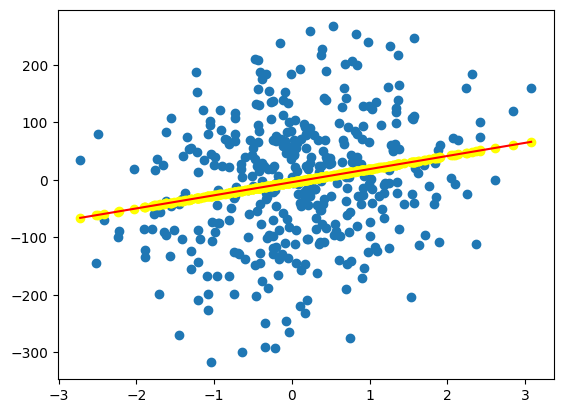

In [123]:
# Выводим практические значения и предсказанные (по linspace, а также по реальных данным)
# Видим, что очень плохо предсказано
# По краям графика желтые точки очень редкие так как реальные данные на краях также редкие
# По сути это проекция реального (истинного) значения на график подобранной функции.
plt.scatter(x[0], y)
plt.plot(xx, y_pred_linspace, color='red')
plt.scatter(x[0], y_pred_real, color='yellow')

In [124]:
# Коэффициент детерминации, в нашем случае он очень низкий
binary0.score(x[[0]], y)

0.04364336234689348

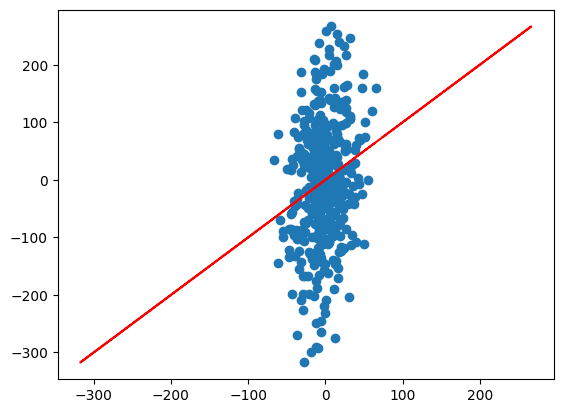

In [125]:
# Строим график ральных (истинных) значений и предсказанных.
plt.scatter(y_pred_real, y)
# Референсная линия. Чем ближе точки к ней - тем предсказанные значения ближе к истинным.
# Видим, что предсказание плохое. Причина - такие данные, ничего сделать нельзя.
# Лучше построим регрессию по другому столбцу
plt.plot(y, y, color='red')

In [126]:
binary1 = LinearRegression().fit(x[[1]], y)
print(f'Коэффициент детерминации: {binary1.score(x[[1]], y)}')

Коэффициент детерминации: 0.7699743283650629


In [127]:
# Предсказанные значения от минимального к максимальному в количестве 100 штук
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
y_pred_linspace = binary1.predict(xx)

# Предсказанные значения y по реальным (истинным) данным
y_pred_real = binary1.predict(x[[1]])

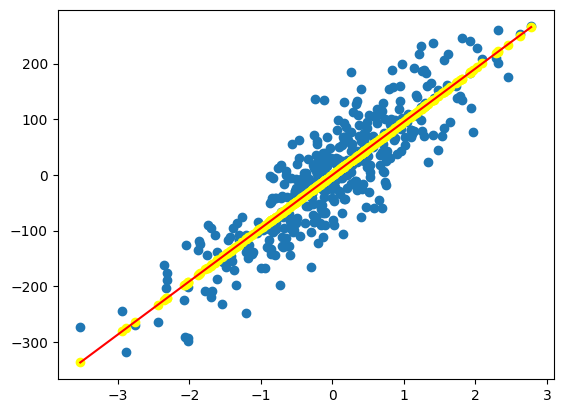

In [129]:
# Строим аналогичные график, видим очень хорошую зависимость.
plt.scatter(x[1], y)
plt.plot(xx, y_pred_linspace, color='red')
plt.scatter(x[1], y_pred_real, color='yellow')

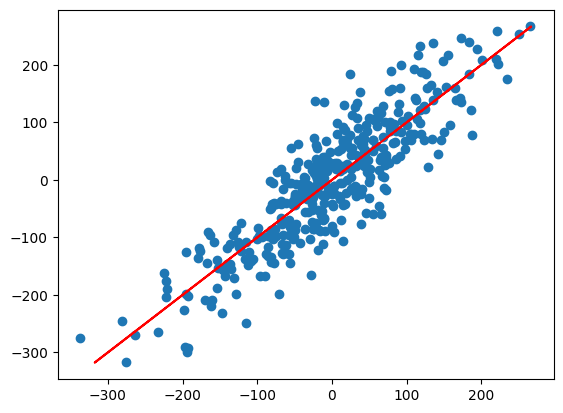

In [130]:
# Аналогично. Строим график реальных (истинных) значений и предсказанных.
plt.scatter(y_pred_real, y)
# Референсная линия. Чем ближе точки к ней - тем предсказанные значения ближе к истинным.
# Видим, что предсказание плохое. Причина - такие данные, ничего сделать нельзя.
# Лучше построим регрессию по другому столбцу
plt.plot(y, y, color='red')

In [135]:
# Теперь автоматизируем процесс расчета коэффициентов отдельно по каждому столбцу.
score_total = 0
for i in range(5):
    binary = LinearRegression().fit(x[[i]], y)
    score = binary.score(x[[i]], y)
    score_total += score
    print(f'Коэффициент детерминации для столбца {i}: {score}')
print(f'Сумма коэффициентов {score_total}')    

Коэффициент детерминации для столбца 0: 0.04364336234689348
Коэффициент детерминации для столбца 1: 0.7699743283650629
Коэффициент детерминации для столбца 2: 0.18794528514998887
Коэффициент детерминации для столбца 3: 0.047470345664983093
Коэффициент детерминации для столбца 4: 0.00017176151145947838
Сумма коэффициентов 1.0492050830383879


In [133]:
# Теперь множественная регрессия.
multiple = LinearRegression().fit(x, y)
print(f'Коэффициент детерминации: {multiple.score(x, y)}')

Коэффициент детерминации: 0.9922198026415868


In [136]:
# Сравниваем истинный y с предсказанным значением
y_pred = multiple.predict(x)

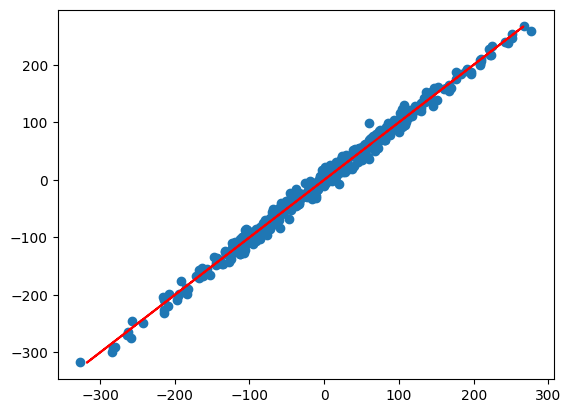

In [138]:
# В множественной регрессии все хорошо сходится.
# Получилась хорошая модель.
plt.scatter(y_pred, y)
plt.plot(y, y, color='red')

In [139]:
# Коэффициенты b1..b5
multiple.coef_

array([[15.79537523, 93.21521093, 37.19410687, 31.19129121, -0.23773114]])

In [142]:
# Коэффициент b0
multiple.intercept_

array([0.56498354])